In [84]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [85]:
iris=load_iris()

In [86]:
x=iris.data[:,(2,3)]
y=(iris.target==0).astype(int)

In [87]:
clf=Perceptron()

In [88]:
clf.fit(x,y)

Perceptron()

In [89]:
y_pred=clf.predict(x)

In [90]:
import pandas as pd
y_pred = clf.predict(x)
result = pd.Series(y_pred == y)
print(result.value_counts()/len(y))

True    1.0
Name: count, dtype: float64


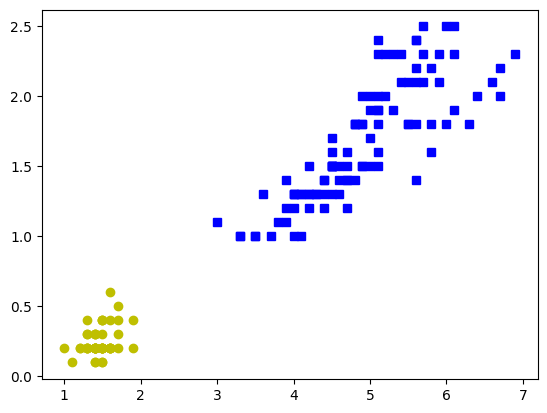

In [91]:
plt.plot(x[y==0, 0], x[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "yo", label="Iris-Setosa")

In [92]:
print(clf.intercept_)

[2.]


In [93]:
clf.coef_

array([[-0.7, -1.2]])

In [94]:
def sigmoid(n):
  return 1/(1+np.exp(-n));
def relu(n):
  return np.maximum(0,n)

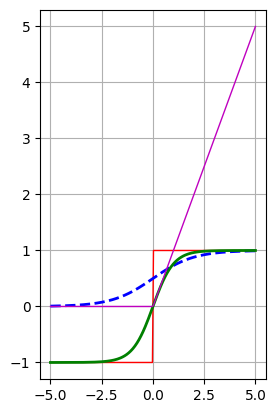

In [95]:
z=np.linspace(-5,5,200)
plt.subplot(121)
plt.plot(z,np.sign(z),'r-',linewidth=1,label="STEP")
plt.plot(z,sigmoid(z),'b--',linewidth=2,label="SIGMOID")
plt.plot(z,np.tanh(z),'g-',linewidth=2,label="TANH")
plt.plot(z,relu(z),'m-',linewidth=1,label="RELU")
plt.grid()


In [96]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist=keras.datasets.fashion_mnist

In [97]:
fashion_mnist=keras.datasets.fashion_mnist

In [98]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [99]:
x_train_full.shape

(60000, 28, 28)

In [100]:
x_train_full.dtype

dtype('uint8')

In [101]:
y_train_full.shape

(60000,)

In [102]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [103]:
x_valid,x_train=x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

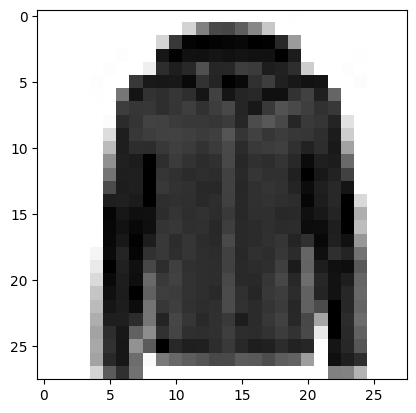

In [104]:
plt.imshow(x_train[0],cmap='binary')

In [105]:
y_train[0]

4

In [106]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [107]:
class_names[y_train[0]]

'Coat'

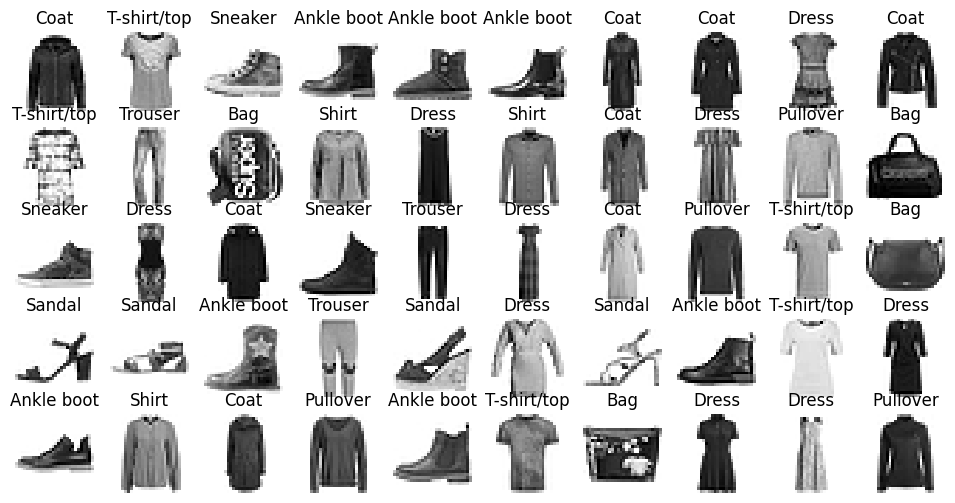

In [108]:
r=5
c=10
plt.figure(figsize=(1.2*c,1.2*r))
for i in range(r):
  for j in range(c):
    index=c*i+j
    plt.subplot(r,c,index+1)
    plt.imshow(x_train[index],cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]],fontsize=12)


In [113]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])

In [114]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [116]:
model.layers[2].name

'dense_7'

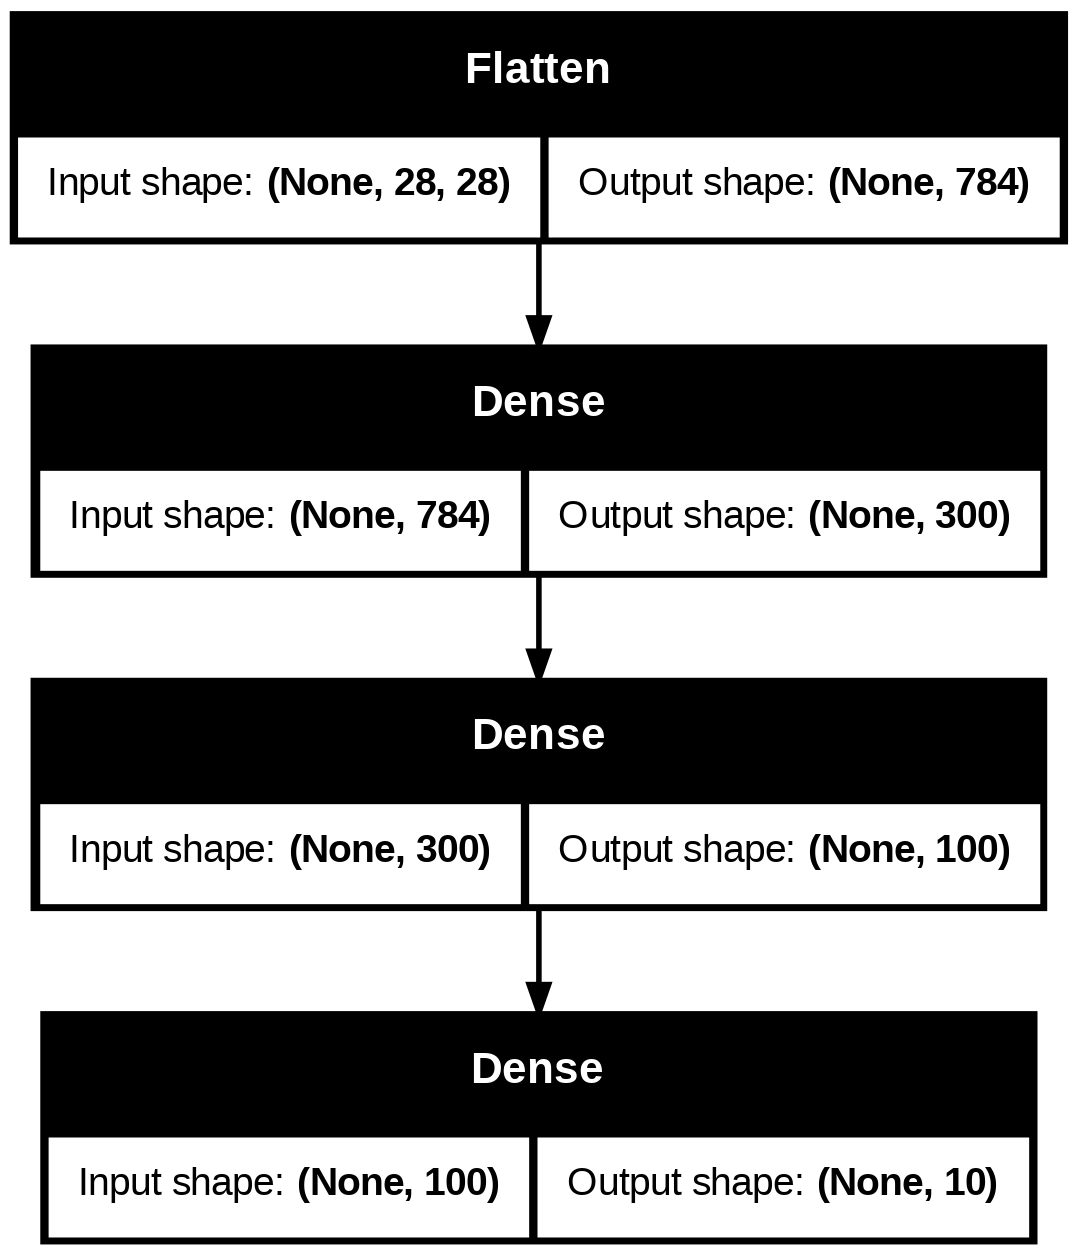

In [118]:
keras.utils.plot_model(model,show_shapes=True)

In [120]:
hidden1=model.layers[1]

In [121]:
hidden1.name

'dense_6'

In [124]:
model.get_layer(hidden1.name) is hidden1

True

In [125]:
weights,bais=hidden1.get_weights()

In [126]:
print(weights.shape)
weights

(784, 300)


array([[ 0.04450252, -0.02821346,  0.03752839, ..., -0.00045285,
         0.03592531, -0.03406922],
       [-0.04086782,  0.07115573, -0.05980447, ...,  0.02992889,
        -0.0614711 , -0.03716331],
       [-0.00408769,  0.02581991, -0.06805177, ...,  0.06583063,
         0.06671213, -0.0389444 ],
       ...,
       [-0.03954149,  0.03365506, -0.07293651, ..., -0.01260298,
         0.02835997,  0.05158925],
       [ 0.05138423,  0.06321397, -0.00915931, ..., -0.01373949,
        -0.05300241, -0.05108193],
       [ 0.06134717,  0.04992567, -0.01786314, ...,  0.05229302,
        -0.00359639,  0.03210106]], dtype=float32)

In [127]:
print(bais.shape)
bais

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [131]:
 model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

In [132]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6784 - loss: 0.9988 - val_accuracy: 0.8130 - val_loss: 0.5303
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8260 - loss: 0.5018 - val_accuracy: 0.8414 - val_loss: 0.4501
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8406 - loss: 0.4510 - val_accuracy: 0.8506 - val_loss: 0.4318
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8511 - loss: 0.4291 - val_accuracy: 0.8570 - val_loss: 0.4046
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8580 - loss: 0.4008 - val_accuracy: 0.8694 - val_loss: 0.3759
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8666 - loss: 0.3809 - val_accuracy: 0.8534 - val_loss: 0.4112
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8682 - loss: 0.3680 - val_accuracy: 0.8652 - val_loss: 0.3752
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8753 - loss: 0.35

In [133]:
import pandas as pd

(0.0, 1.0)

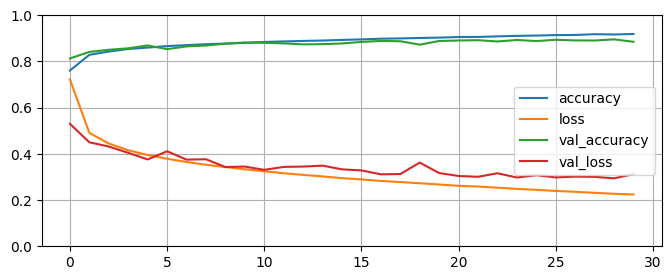

In [140]:
pd.DataFrame(history.history).plot(figsize=(8,3))
plt.grid()
plt.gca().set_ylim(0,1)

In [142]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 60.1051


[61.453582763671875, 0.8547000288963318]